In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf

In [3]:
df=pd.read_excel('Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:xlabel='Month', ylabel='Passengers'>

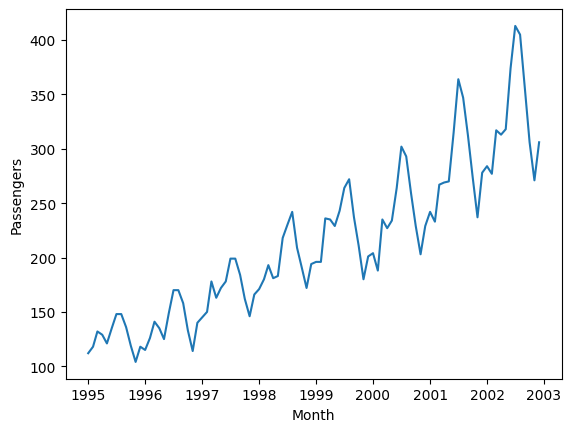

In [4]:
sns.lineplot(x='Month',y='Passengers',data=df)

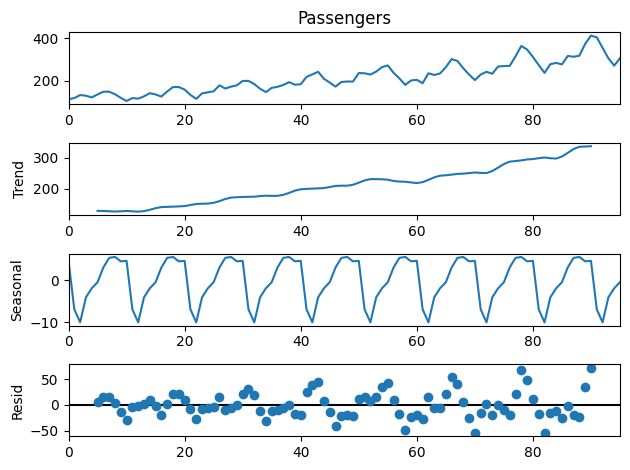

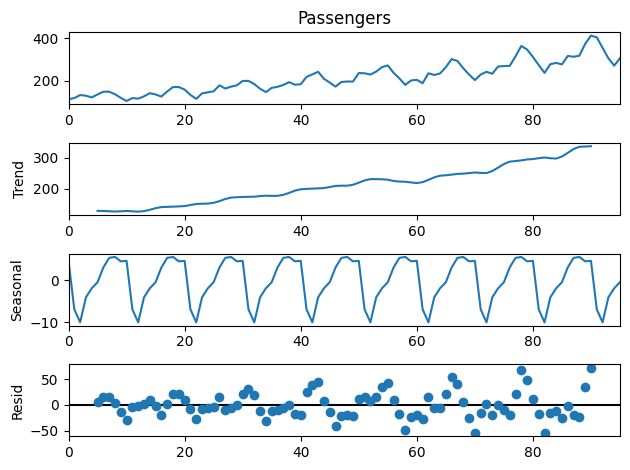

In [14]:
seasonal_ts_add=smf.tsa.seasonal_decompose(df["Passengers"],period=10)
seasonal_ts_add.plot()

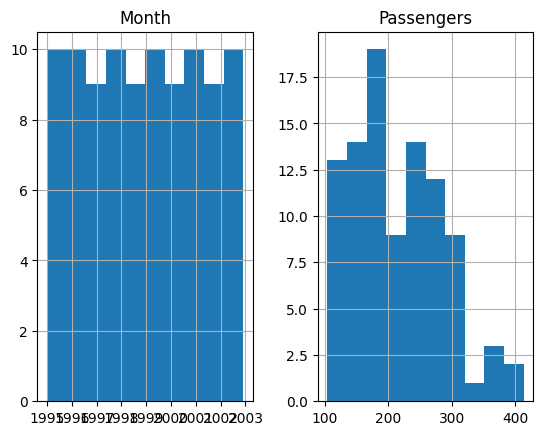

In [8]:
df.hist()
pyplot.show()

In [9]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [10]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [12]:
df['Month']=pd.to_datetime(df['Month'])
df['Months']=df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


<AxesSubplot:>

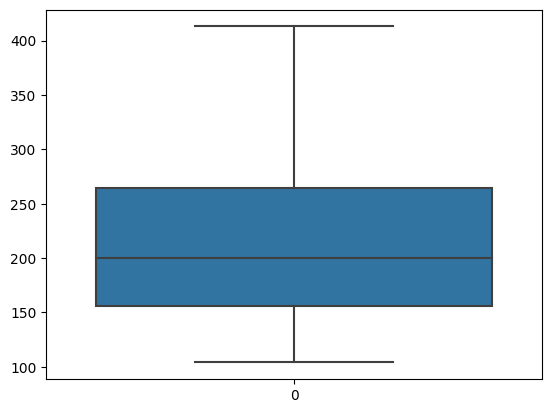

In [13]:
sns.boxplot(data=df['Passengers'])

In [16]:
dummis=pd.DataFrame(pd.get_dummies(df['Months']))
df1=pd.concat([df,dummis],axis=1)
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
df1['t']=np.arange(1,97)
df1['t_squared']=df1['t']*df1['t']
df1['log_Passengers']=np.log(df1['Passengers'])
df1.columns
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [18]:
train=df1.head(75)
test=df1.head(25)

In [19]:
import statsmodels.formula.api as smf

In [23]:
# L I N E A R

lin_model=smf.ols('Passengers~t',data=train).fit()
pred_lin=pd.Series(lin_model.predict(pd.DataFrame(test['t'])))
rmse_lin = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_lin))**2))
print("RMSE Linear: ",rmse_lin)

RMSE Linear:  17.31088558272981


In [24]:
# E x p o n e n t i a l

exp=smf.ols('log_Passengers~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_exp))**2))
print("RMSE exponential: ",rmse_exp)

RMSE exponential:  129.83551147094596


In [30]:
# Q u a d r  a t i c

quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
print("RMSE Quadratic: ",rmse_quad)

RMSE Quadratic:  17.549024068494216


In [26]:
# Additive seasonality 

ada = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_ada = pd.Series(ada.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ada = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_ada))**2))
print("RMSE Additive seasonality: ",rmse_ada )

RMSE Additive seasonality:  52.5869839822911


In [27]:
#Additive Seasonality Quadratic

asq = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_asq = pd.Series(asq.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_asq = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_asq))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_asq )

RMSE Additive Seasonality Quadratic: 9.518426185416653


In [32]:
# Multiplicative Seasonality

mea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_mea = pd.Series(mea.predict(test))
rmse_mea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_mea)

RMSE Multiplicative Seasonality: 47.322585564581594


In [33]:
# Multiplicative Additive Seasonality

mas = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_mas = pd.Series(mas.predict(test))
rmse_mas = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mas)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_mas )

RMSE Multiplicative Additive Seasonality: 5.7519576563091475


In [34]:
# Testing 

data1 = {"MODEL":pd.Series(["rmse_lin","rmse_exp","rmse_quad","rmse_ada","rmse_asq","rmse_mea","rmse_mas"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_exp,rmse_quad,rmse_ada,rmse_asq,rmse_mea,rmse_mas])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_lin,17.310886
1,rmse_exp,129.835511
2,rmse_quad,17.549024
3,rmse_ada,52.586984
4,rmse_asq,9.518426
5,rmse_mea,47.322586
6,rmse_mas,5.751958


In [35]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [37]:
# create dummies and T and TSquared columns

dum=pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1=pd.concat([forecast,dum],axis=1)
forecast1['t']=np.arange(1,13)
forecast1['t_squared']=forecast1['t']*forecast1['t']
print("\n After dummy, T and TSquare\n\n",forecast1.head())


 After dummy, T and TSquare

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [38]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df1).fit()
pred_n  = pd.Series(model_full.predict(forecast1))
forecast1["Forecasted_log"] = pd.Series(pred_n)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [40]:
# final prediction for next 12 months

final_pred=forecast1.loc[:,['Date','Forecasted_Passengers']]
final_pred

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736
